## MS Example 1: Additive Noise, Surrogate-Based Methods

In [1]:
import numpy as np
import dfo_v1 as dfo
import ECNoise as ECN
import active_subspaces as ac
import matplotlib.pyplot as plt

We let $t: \mathbf{x}: \mathbb{R}^{10} \to \mathbb{R}$, where $t(\mathbf{x})=x_1^2+x_2^2+x_3^2+ k\epsilon$, where $\epsilon \sim N(0,1)$ so that $k\epsilon \sim N(0,k^2)$ and $L_1=2$.

We choose $\mathbf{x}^{(0)}=(100,0.1,u,u,\ldots,u)$, $u \sim U[-100,100]$.

In [2]:
dim=10
xinit=np.transpose([200*np.random.rand(dim)])
print(np.shape(xinit))

#my nasty initial condition, but all others will plateau
xinit[0]=100
xinit[1]=.1
print(np.transpose(xinit))

(10, 1)
[[1.00000000e+02 1.00000000e-01 1.72561491e+02 8.53731348e+00
  9.27920094e+01 4.74289096e+01 1.21518602e+02 1.19985866e+02
  5.51955433e+01 4.81138367e+01]]


In [3]:
k=1E-4
def tfun(x,var=k):
    y=np.copy(x)
    return np.dot(np.transpose(y[0:3,:]),y[0:3,:])+(k**.5)*np.random.randn(1)
# Print check
print(tfun(xinit))

[[39777.48318365]]


In [4]:
M=15 # number of ECNoise f evals

noise_array=ECN.ECNoise(tfun,xinit,M)
mynoise=noise_array[0][0]
gen_f_vals=noise_array[2]
print(gen_f_vals, mynoise)

(10, 1) (10, 1)
[39777.47727573 39788.97691554 39800.49756816 39811.99161909
 39823.48220745 39834.99075294 39846.49219793 39858.01289961
 39869.538005   39881.04228442 39892.56608967 39904.09914973
 39915.63595617 39927.15498022 39938.68423384] 1.8639551478898347e-05


In [5]:
print('estimated noise var is', mynoise, 'true var is', k, 'with relative error', abs(mynoise-k)/k)

estimated noise var is 1.8639551478898347e-05 true var is 0.0001 with relative error 0.8136044852110165


In [6]:
h=1/M
fm=gen_f_vals[1]
f0=gen_f_vals[2]
fp=gen_f_vals[3]
L_1_hat=abs(fp-2*f0+fm)*(1/h)**2

d1=abs(fp-f0)*(1/h)
d2=abs(fm-f0)*(1/h)
L_1_hat_1=abs(d1-d2)*(1/h)


print('estimated upper bound on ||f''|| is', L_1_hat, 'estimated value of L_1 from FD is', L_1_hat_1)

estimated upper bound on ||f|| is 5.98537900550582 estimated value of L_1 from FD is 5.98537900550582


In [7]:
mu_star=dfo.get_mu_star(mynoise,L_1_hat,dim)
h=dfo.get_h(L_1_hat,dim)

In [8]:
x=np.copy(xinit)
maxit=300
xhist=np.array(x)
fhist=np.array(tfun(x))
yhist=xhist
ghist=fhist
L1Bhist=np.array(L_1_hat)
for i in range(maxit):
    [x,f,y,fy,p,q,L1B]=dfo.STARS(x,tfun,mu_star,h)
    xhist=np.hstack((xhist,x))
    fhist=np.vstack((fhist,f))
    yhist=np.hstack((yhist,y))
    ghist=np.vstack((ghist,fy))
    L1Bhist=np.vstack((L1Bhist,L1B))

In [9]:
print('our algorithm terminates with x value',np.transpose(x), 'which has f value',f)

our algorithm terminates with x value [[ 12.75906935  -1.60467844  22.64619721   1.93655225 106.96516444
   34.96317523 134.87791187 120.0084473   60.75277809  51.22077312]] which has f value [[678.2165849]]


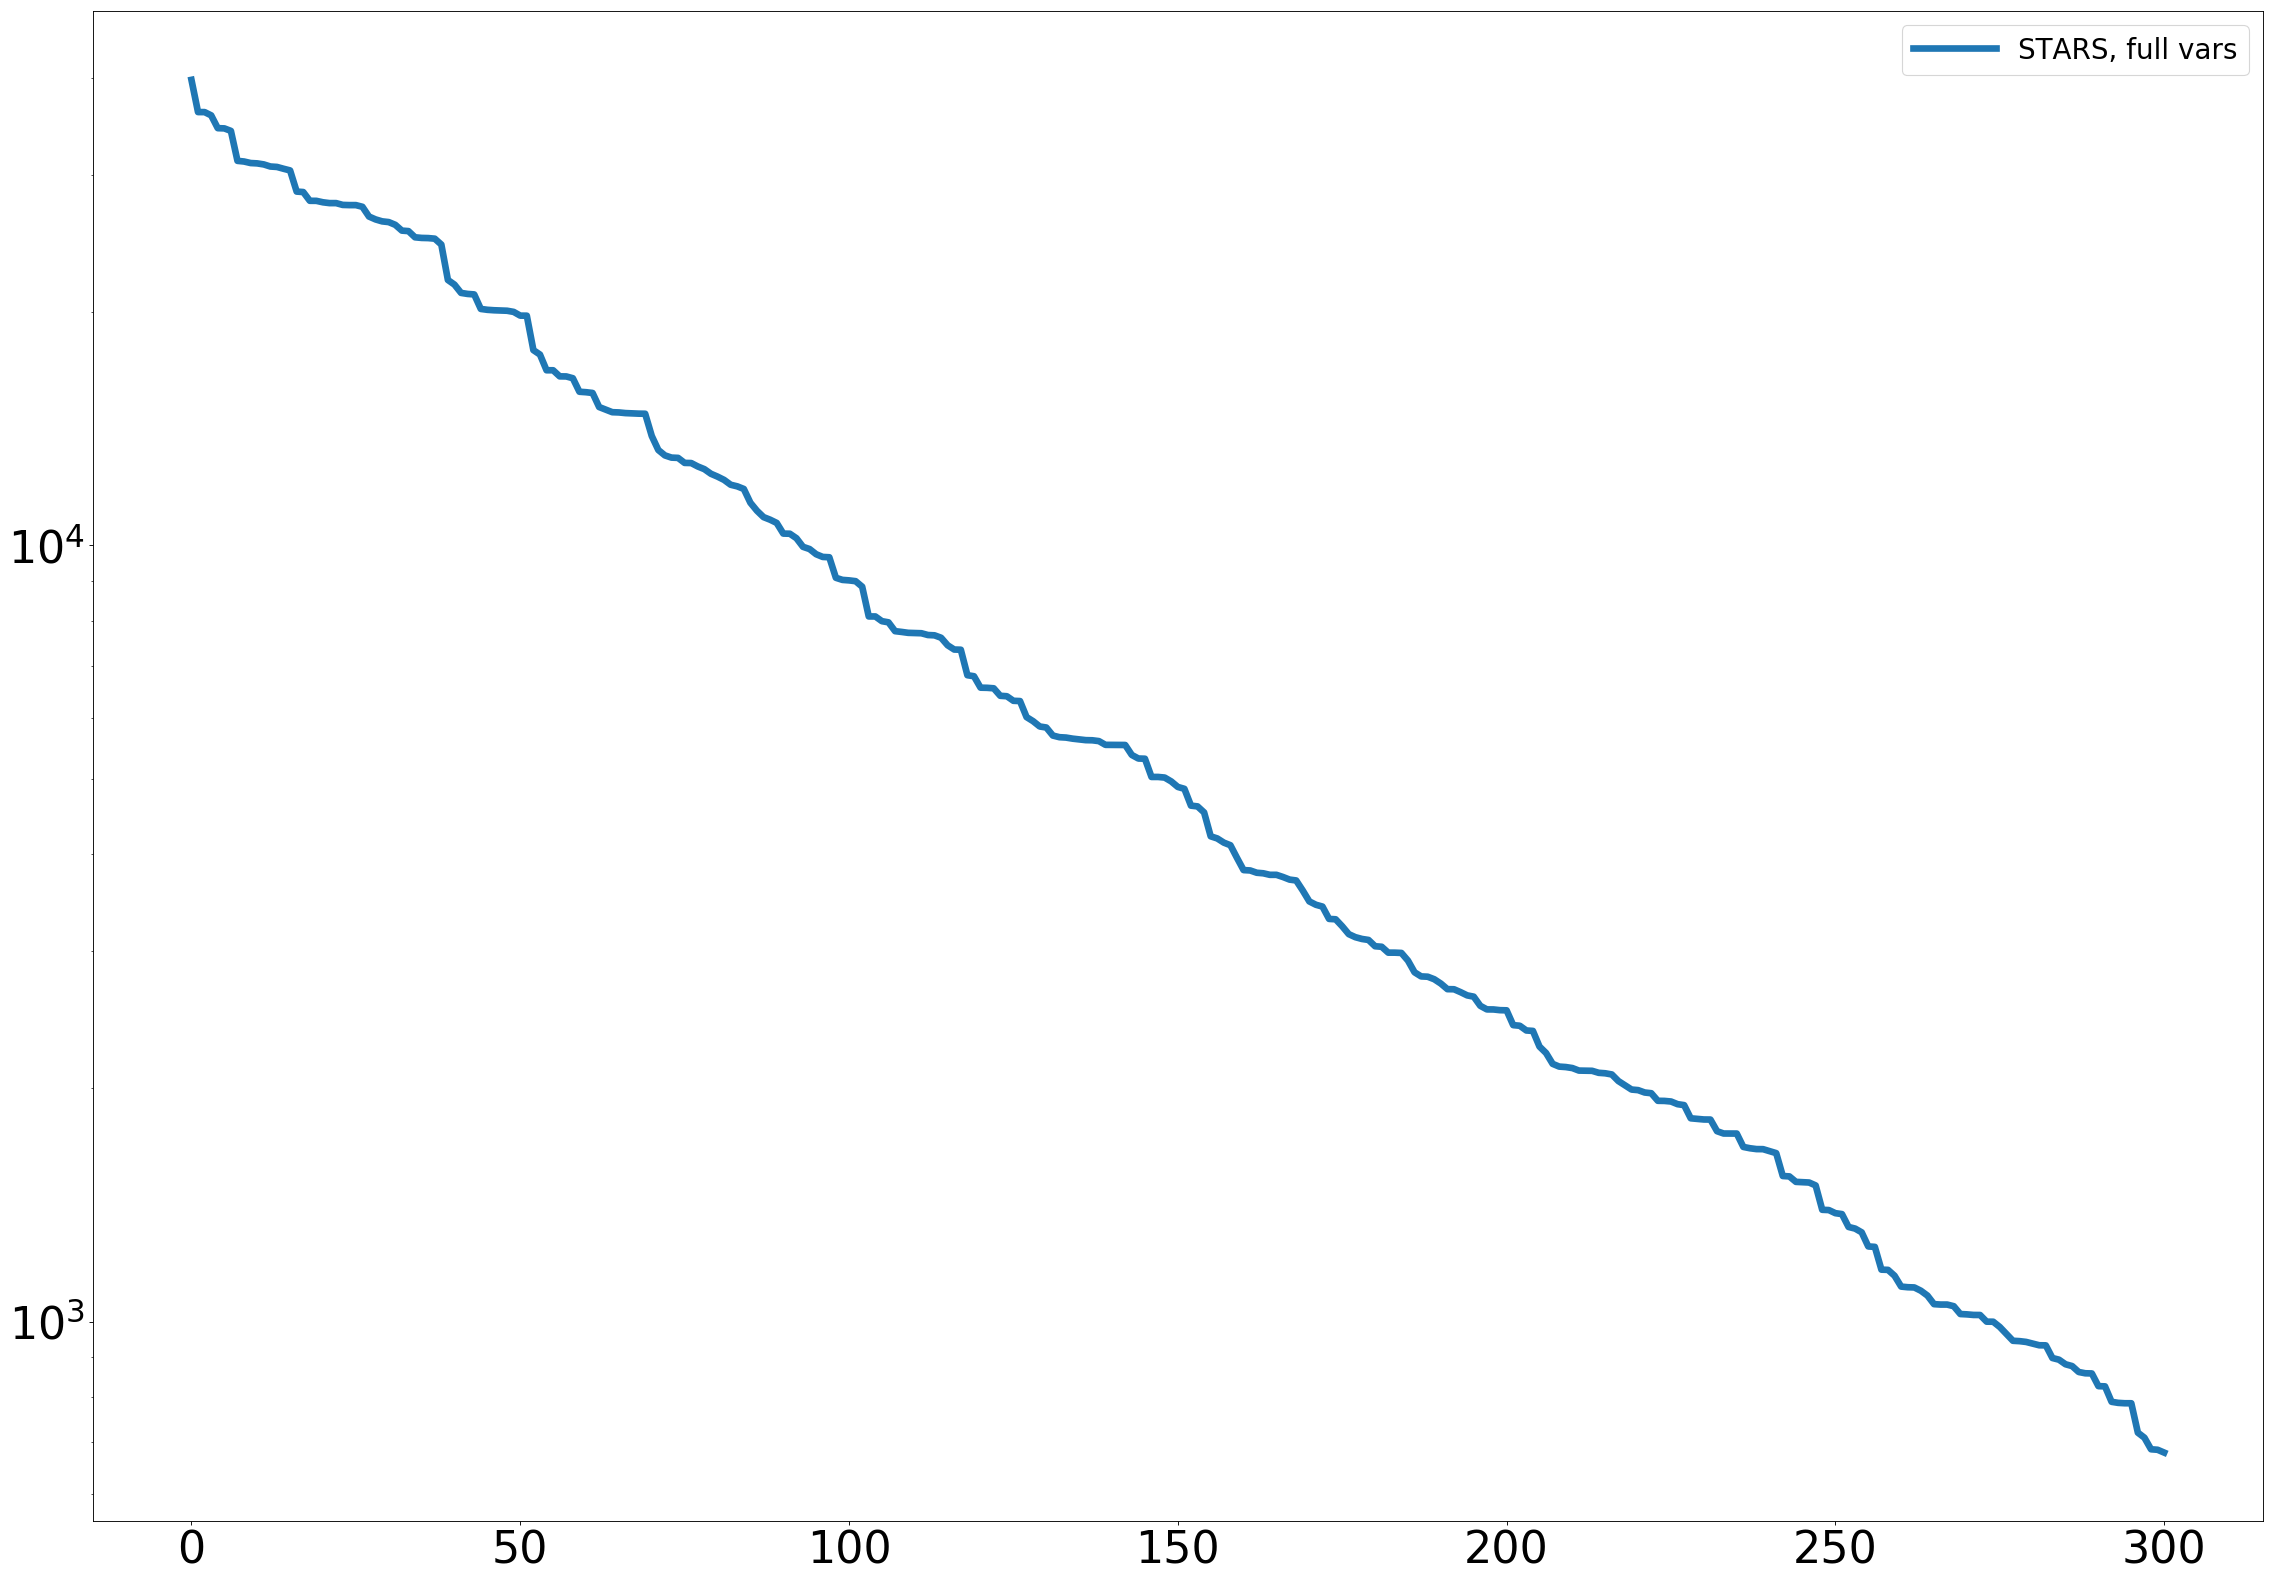

In [10]:
params = {'legend.fontsize': 25,
          'legend.handlelength': 3}
plt.rcParams["figure.figsize"] = (35,25)
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['font.size'] = 40
plt.rcParams['figure.titlesize'] = 'xx-large'
plt.rcParams.update(params)


plt.semilogy(fhist,lw=6,label='STARS, full vars')
plt.legend()
plt.show()

n should be an integer. Performing conversion.
[[3.25136086e+02]
 [3.51874115e+00]
 [2.14281214e+00]
 [1.86151423e+00]
 [1.27502149e+00]
 [9.57617516e-01]
 [6.27078003e-01]
 [1.53091446e-01]
 [9.57353798e-02]
 [8.98146350e-02]] [[ 0.26876801]
 [-0.7049694 ]
 [-0.04447725]
 [-0.25753076]
 [-0.01840732]
 [ 0.05962701]
 [ 0.27910102]
 [ 0.01425512]
 [ 0.46359233]
 [ 0.25606434]]
n should be an integer. Performing conversion.
[[2.10138267e+00]
 [2.00079730e+00]
 [1.99812673e+00]
 [1.00233960e+00]
 [1.19135901e-02]
 [8.14516992e-03]
 [4.35642880e-03]
 [2.89310575e-03]
 [4.05321669e-04]
 [1.53565004e-04]] [[ 0.90809366]
 [-0.03333103]
 [-0.37927267]
 [ 0.06489003]
 [-0.01435879]
 [-0.11864686]
 [ 0.02109169]
 [ 0.04177643]
 [-0.0586318 ]
 [-0.0792806 ]]
n should be an integer. Performing conversion.
[[2.05240355e+00]
 [2.00209579e+00]
 [2.00000928e+00]
 [4.98418932e-01]
 [3.66817743e-03]
 [1.81201330e-03]
 [9.39320329e-04]
 [7.27348633e-04]
 [6.15946275e-04]
 [2.85070145e-04]] [[ 3.75423190e

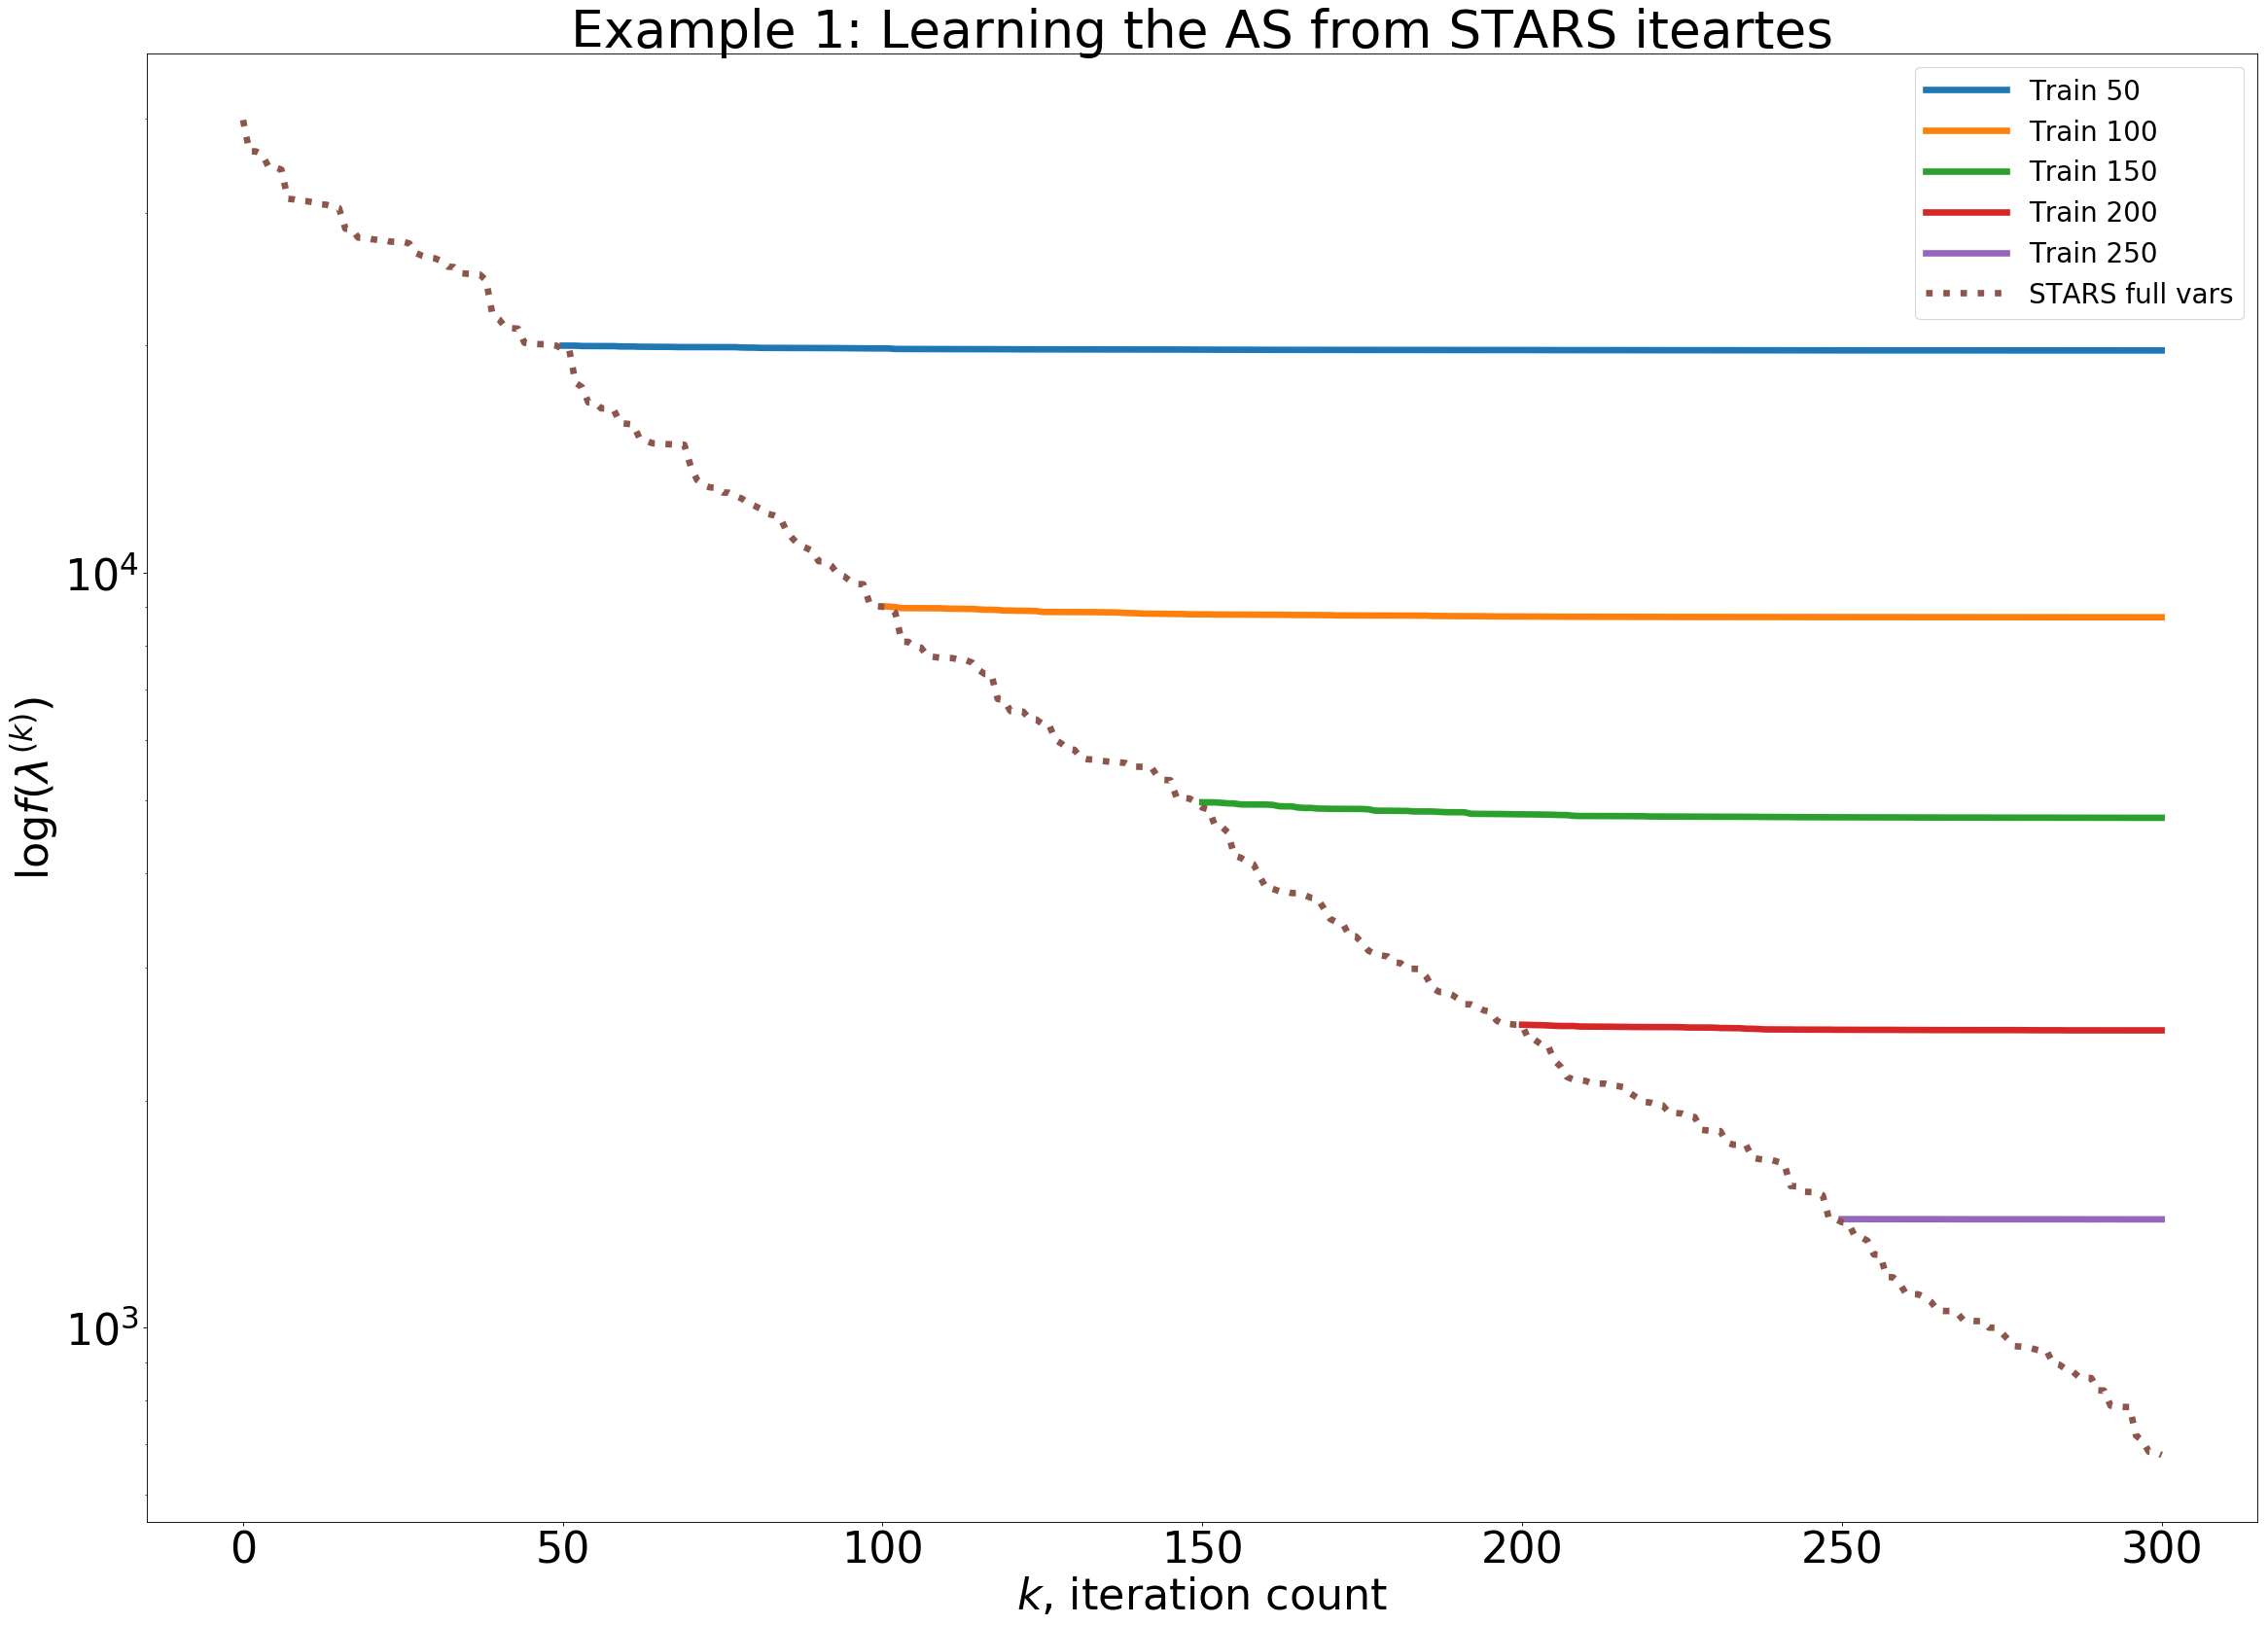

In [49]:
#plt.figure(figsize=(15,10))
ss = ac.subspaces.Subspaces()
mu_star=dfo.get_mu_star(mynoise,L_1_hat,1)
h=dfo.get_h(L_1_hat,1)

for tr_stop in range(50,300,50):

    trainx=np.hstack((xhist[:,0:tr_stop],yhist[:,0:tr_stop]))
    trainf=np.vstack((fhist[0:tr_stop],ghist[0:tr_stop]))
    trainx=np.transpose(trainx)


    # Use Local Linears
    #df = ac.gradients.local_linear_gradients(x_hist, f_hist) #Estimated gradients using local linear models
    #ss.compute(df=df, nboot=0)
    
    # Use Global Quadratic
    ss.compute(X=trainx, f=trainf, nboot=0, sstype='QPHD')

    sub=ss.eigenvecs[:,0:1]
 
    x4=np.transpose([xhist[:,tr_stop-1]])
    xhist4=np.array(x4)
    fhist4=np.array(tfun(x4))
    
    our_wts=np.sqrt(ss.eigenvals)
    print(our_wts,sub)
    #ac.utils.plotters.subspace_errors(ss.sub_br)


    for i in range(0,300-tr_stop):
        [x4,f,temp,temp2,p,q,L1B]=dfo.STARS(x4,tfun,mu_star,h,active=sub,wts=our_wts)
        xhist4=np.hstack((xhist4,x4))
        fhist4=np.vstack((fhist4,f))
    plt.semilogy(range(tr_stop,301),fhist4,label='Train '+str(tr_stop),lw=6)


plt.semilogy(fhist, ls=':', lw=6, label='STARS full vars')

plt.xlabel('$k$, iteration count')
plt.ylabel('$\log f(\lambda^{(k)})$')
plt.title('Example 1: Learning the AS from STARS iteartes')
plt.legend()
plt.show()

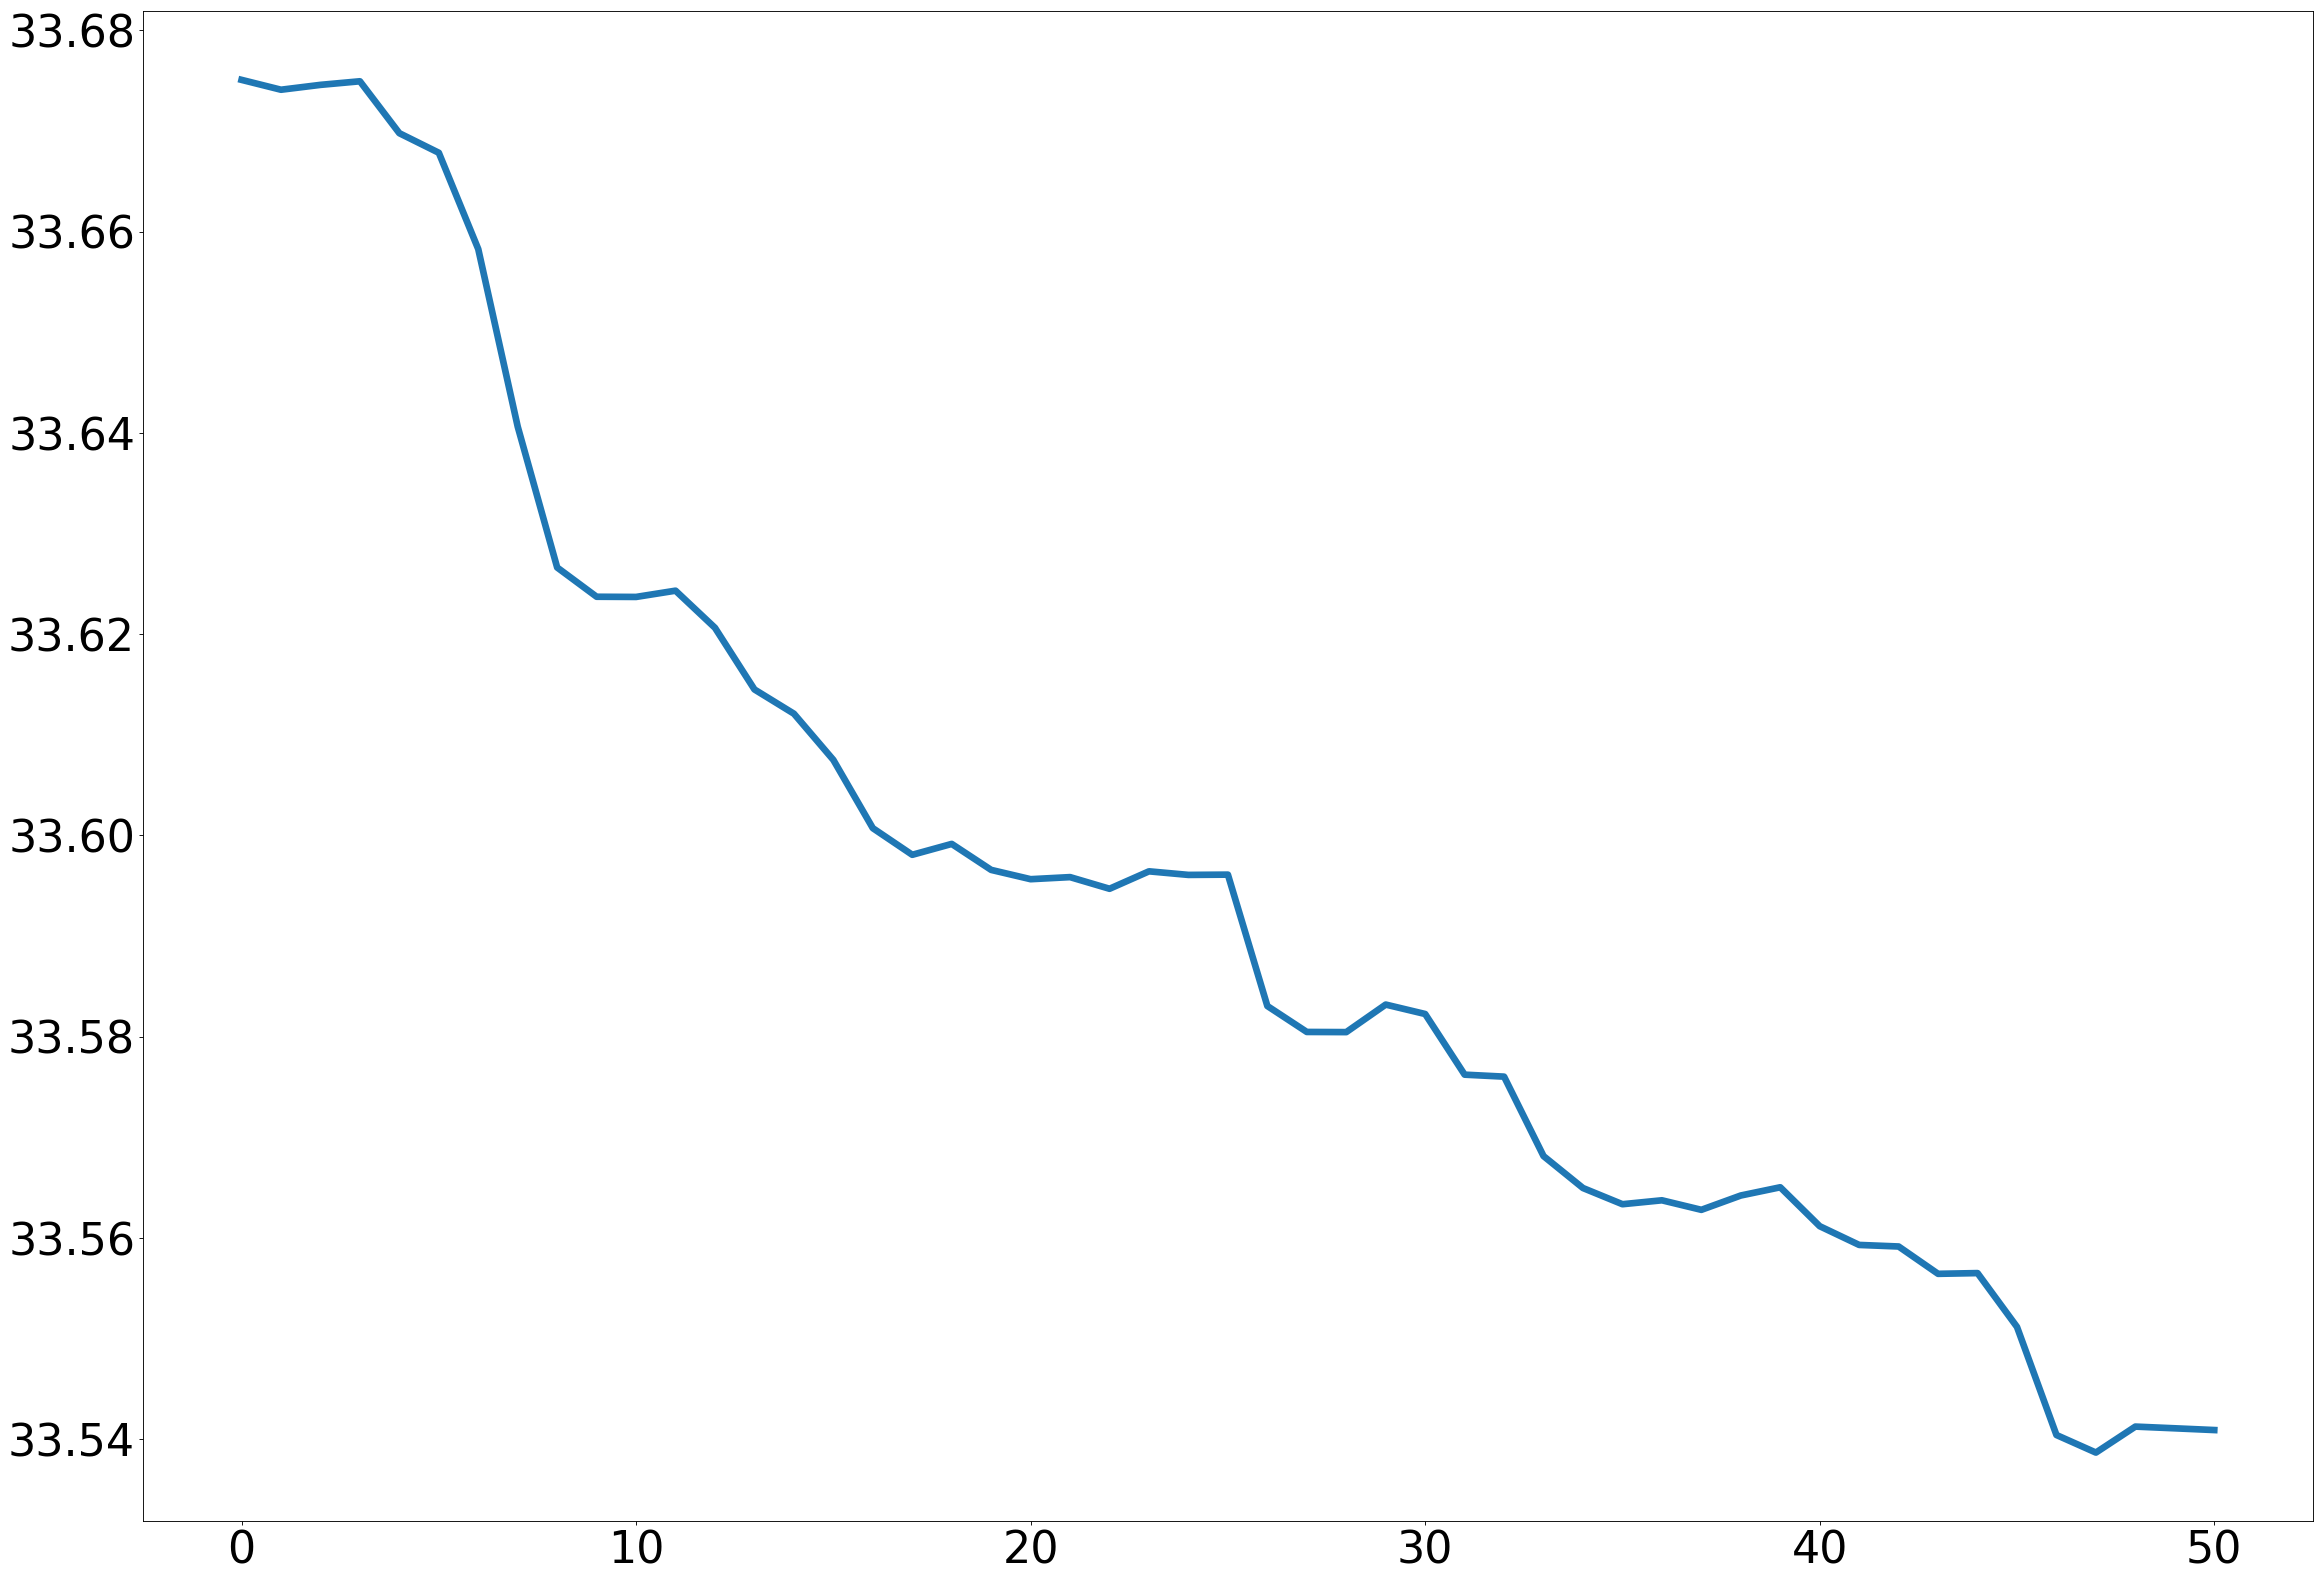

In [21]:
plt.plot(xhist4[2,:],lw=6)

In [34]:
ss = ac.subspaces.Subspaces()

tr_stop=100

trainx=np.hstack((xhist[:,0:tr_stop],yhist[:,0:tr_stop]))
trainf=np.vstack((fhist[0:tr_stop],ghist[0:tr_stop]))
trainx=np.transpose(trainx)

# Use Global Quadratic
ss.compute(X=trainx, f=trainf, nboot=0, sstype='QPHD')
    
RS=ac.utils.response_surfaces.PolynomialApproximation(2)
    
y1 = trainx.dot(ss.W1)
    
RS.train(y1, trainf)

print(ss.W1,ss.eigenvals)

n should be an integer. Performing conversion.
[[ 9.08093655e-01  2.56839269e-01  2.88877348e-01]
 [-3.33310259e-02 -6.91245581e-01  7.21821241e-01]
 [-3.79272670e-01  6.75427438e-01  6.28894197e-01]
 [ 6.48900265e-02  1.50974035e-03 -1.02745980e-03]
 [-1.43587904e-02  3.02257989e-04  3.15550584e-04]
 [-1.18646857e-01 -7.14762048e-04  5.55453674e-04]
 [ 2.10916898e-02 -3.14911502e-04 -4.03143081e-04]
 [ 4.17764322e-02 -9.69335302e-04  2.03234554e-03]
 [-5.86318000e-02  2.34709660e-03 -2.19461033e-03]
 [-7.92805983e-02  1.21778346e-03 -2.34316770e-03]] [[4.41580912e+00]
 [4.00318985e+00]
 [3.99251043e+00]
 [1.00468468e+00]
 [1.41933629e-04]
 [6.63437930e-05]
 [1.89784719e-05]
 [8.37006090e-06]
 [1.64285655e-07]
 [2.35822106e-08]]


In [50]:
avdom=ac.domains.BoundedActiveVariableDomain(ss)
    
ystar, fstar = ac.optimizers.av_minimize(lambda x: RS.predict(x.reshape(1,3))[0], avdom)

print(ystar,fstar,RS.Rsqr)

[[-0.0129702  -1.69406354  0.34499616]] -40.30062970421524 0.9999993508554922


In [51]:
grid=np.linspace(0,5,1)

In [52]:
plt.plot(y1, trainf, 'bo', grid, RS.predict(grid[:,None])[0],'k-', lw=6, markersize=8)

ValueError: shapes (1,3) and (10,1) not aligned: 3 (dim 1) != 10 (dim 0)

In [ ]:
fhist6=np.vstack((fhist[0:tr_stop],fstar))
 
plt.semilogy(fhist6,label='Train '+str(tr_stop),lw=6)



plt.xlabel('$k$, iteration count')
plt.ylabel('$\log f(\lambda^{(k)})$')
plt.title('Example 1: Learning the AS from STARS iteartes')
plt.legend()
plt.show()